In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/training.csv')
df.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,46,101812,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,17,85509,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15759.0,NaN,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,44,212641,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,42,102702,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,31,185737,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,14,0,0


In [3]:
df['label'].value_counts()

label
0    8656497
1      32029
Name: count, dtype: int64

# locdt loctm
Normalize loctm, for example 120000 => 0.5

In [4]:
df['normalized_loctm'] = df['loctm'] // 10000 * 3600 + (df['loctm'] % 10000)//100 * 60 + df['loctm'] % 100
df['normalized_loctm']=(df['normalized_loctm']-df['normalized_loctm'].min())/(df['normalized_loctm'].max()-df['normalized_loctm'].min()+1)

In [5]:
df[df['loctm']==120000]['normalized_loctm']

55492      0.5
100144     0.5
135444     0.5
154958     0.5
172662     0.5
          ... 
8467822    0.5
8490413    0.5
8518417    0.5
8549609    0.5
8655431    0.5
Name: normalized_loctm, Length: 169, dtype: float64

In [6]:
normalized_loctm = df['normalized_loctm']
df.drop(['loctm', 'normalized_loctm'], axis=1, inplace=True)
df.insert(1, 'loctm', normalized_loctm)
df.head()

,txkey,loctm,locdt,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,0.429306,46,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,0.371632,17,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15759.0,NaN,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,0.893530,44,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,0.435440,42,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,0.790012,31,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,14,0,0


# Transform object values

In [7]:
cats = ['txkey', 'chid', 'cano', 'mchno', 'acqic']

ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_data = ord_encoder.fit_transform(df[cats])

df[cats] = encoded_data

In [8]:
df.dtypes

txkey        float64
loctm        float64
locdt          int64
chid         float64
cano         float64
contp          int64
etymd        float64
mchno        float64
acqic        float64
mcc          float64
conam        float64
ecfg           int64
insfg          int64
iterm        float64
bnsfg          int64
flam1          int64
stocn        float64
scity        float64
stscd        float64
ovrlt          int64
flbmk          int64
hcefg        float64
csmcu        float64
csmam          int64
flg_3dsmk      int64
label          int64
dtype: object

# Fill nan values

In [9]:
na = ['etymd', 'mcc', 'stocn', 'scity', 'stscd', 'hcefg', 'csmcu']

simple_imputer = SimpleImputer(strategy="most_frequent")
imputed_data = simple_imputer.fit_transform(df[na])

df[na] = imputed_data

In [18]:
df.isna().sum()

txkey        0
loctm        0
locdt        0
chid         0
cano         0
contp        0
etymd        0
mchno        0
acqic        0
mcc          0
conam        0
ecfg         0
insfg        0
iterm        0
bnsfg        0
flam1        0
stocn        0
scity        0
stscd        0
ovrlt        0
flbmk        0
hcefg        0
csmcu        0
csmam        0
flg_3dsmk    0
label        0
dtype: int64

# Undersample

## random undersampling
keep all 32029 fraud data and randomly pick 32029 non fraud data

In [10]:
undersample_df = df.sample(frac=1)

In [11]:
fraud_undersample_df = undersample_df.loc[undersample_df['label']==1]
non_fraud_undersample_df = undersample_df.loc[undersample_df['label']==0][:32029]

new_undersample_df = pd.concat([fraud_undersample_df, non_fraud_undersample_df]).sample(frac=1, random_state=42)
new_undersample_df.head()

,txkey,loctm,locdt,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
8537581,4028876.0,0.646632,45,288302.0,348449.0,5,4.0,153945.0,1806.0,272.0,...,0.0,15759.0,1.0,0,0,6.0,70.0,25125,0,0
4975006,1996473.0,0.758796,30,439092.0,412310.0,5,1.0,141595.0,3109.0,320.0,...,0.0,6469.0,1.0,0,0,6.0,70.0,200,0,0
4040845,7933875.0,0.447014,55,246019.0,70017.0,5,8.0,21451.0,1806.0,276.0,...,0.0,15759.0,1.0,0,0,6.0,70.0,997,0,0
8619382,6879723.0,0.257164,42,439086.0,201927.0,5,1.0,150205.0,4694.0,303.0,...,8.0,6710.0,1.0,0,0,6.0,1.0,200,0,1
5465025,6578296.0,0.725116,46,396949.0,536828.0,5,5.0,11974.0,1806.0,288.0,...,0.0,15759.0,1.0,0,0,6.0,70.0,134,0,0


In [12]:
new_undersample_df['label'].value_counts()

label
0    32029
1    32029
Name: count, dtype: int64

## correlation comparison
### summary ###
ecfg and stocn strong positive correlated, scity strong negative correlated, but the correlation from stocn, scity does not mean much

Text(0.5, 1.0, 'Imbalanced correlation matrix')

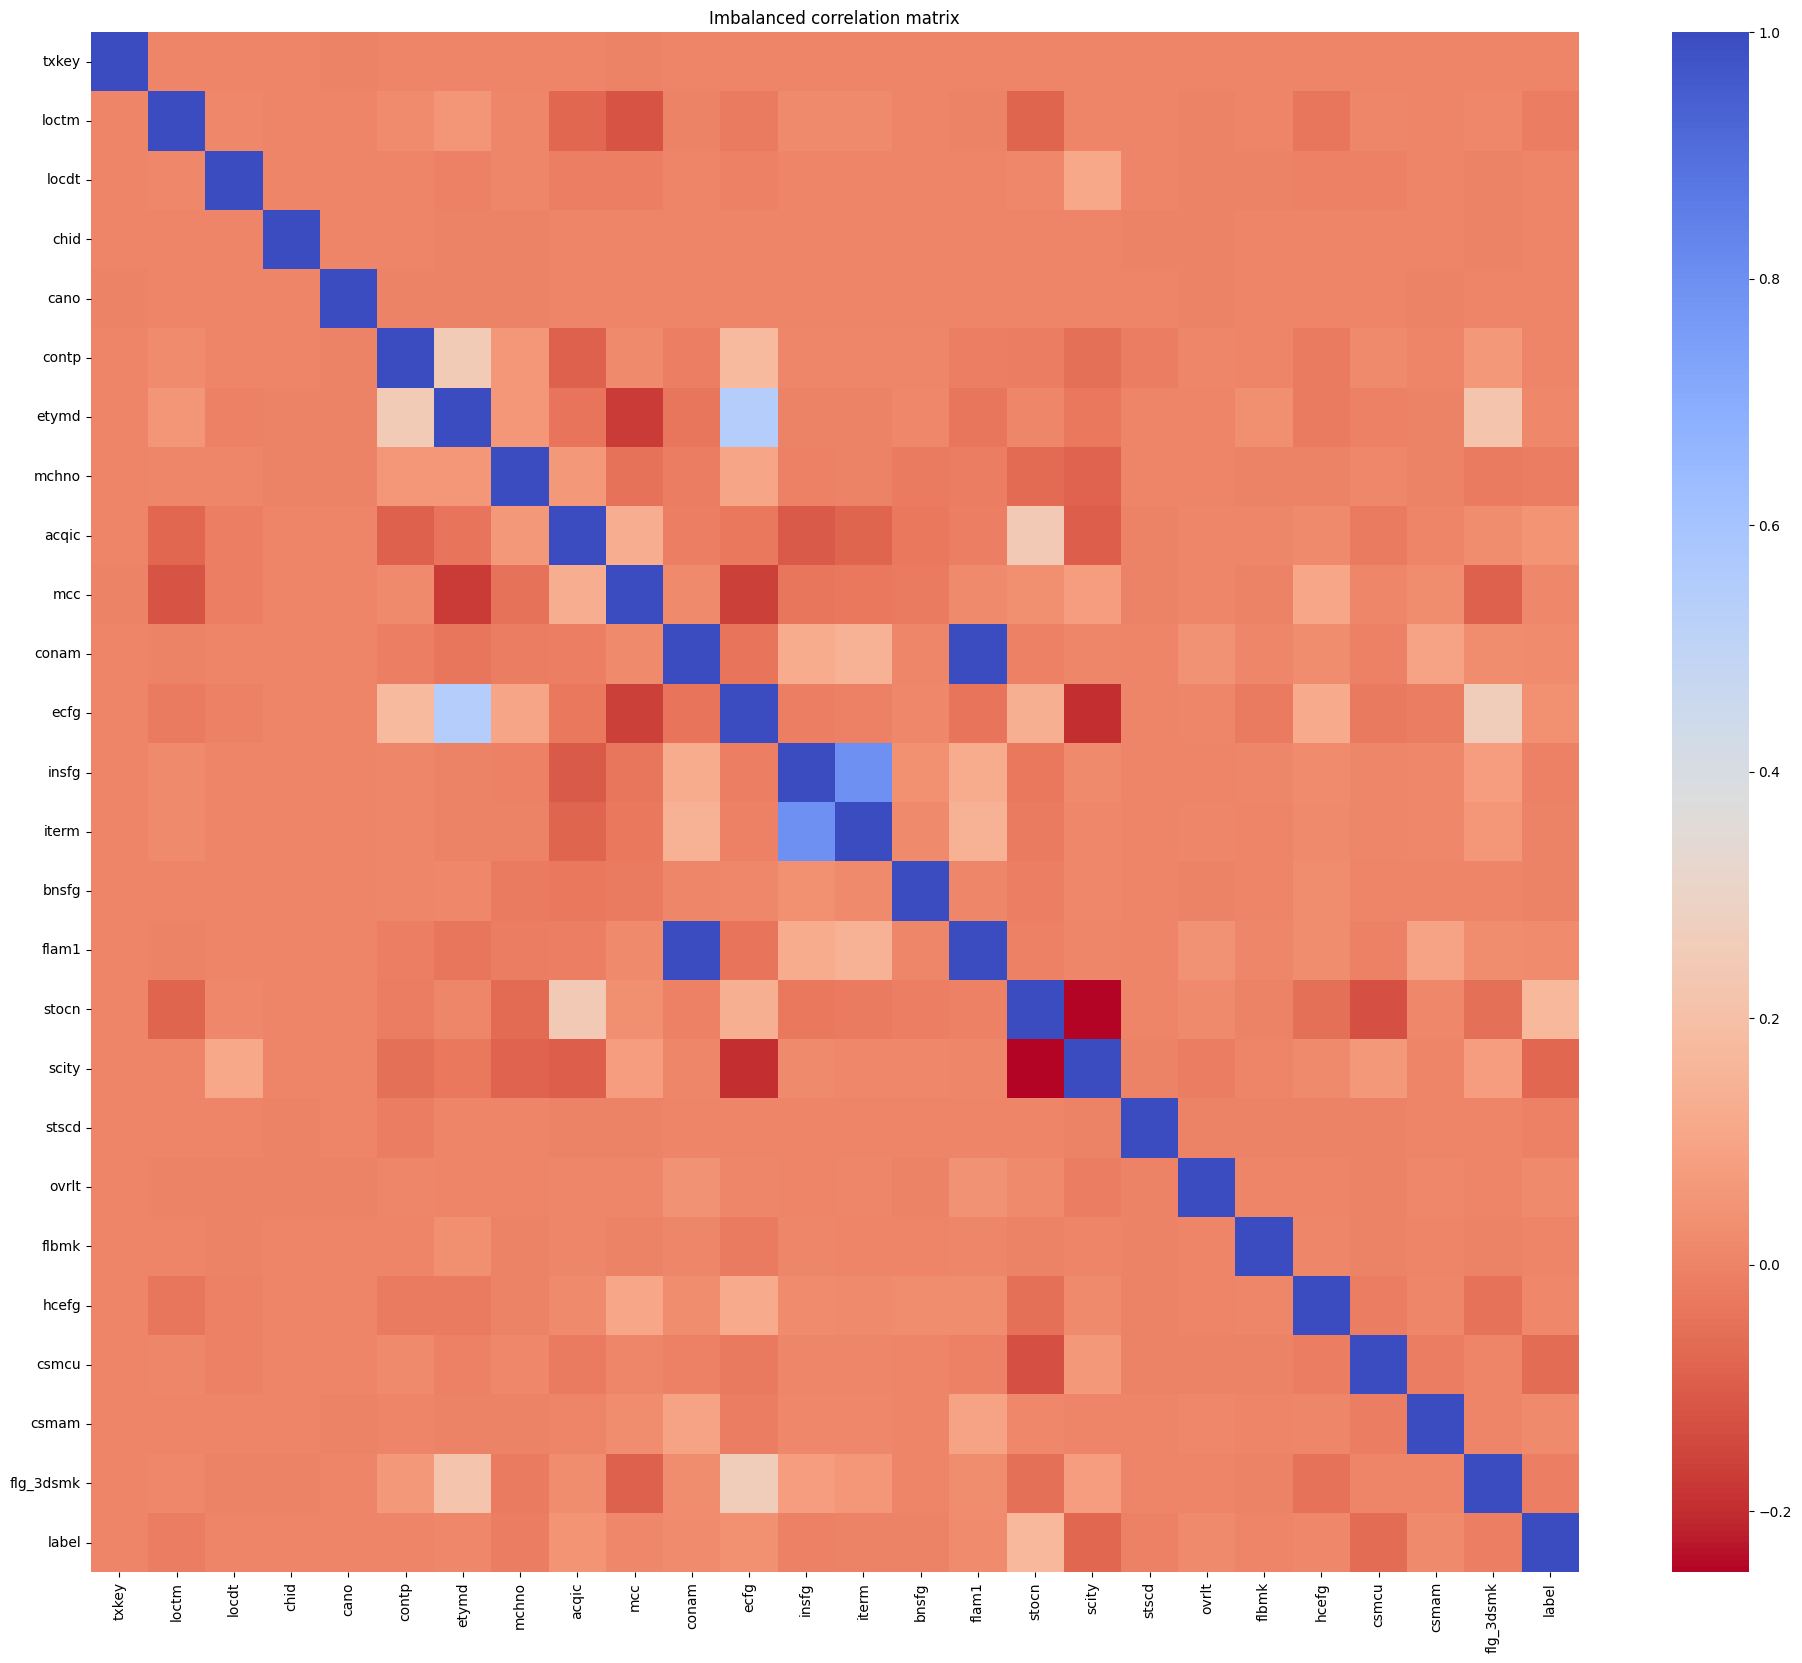

In [13]:
plt.figure(figsize=(24, 20))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Imbalanced correlation matrix')

Text(0.5, 1.0, 'Imbalanced correlation matrix')

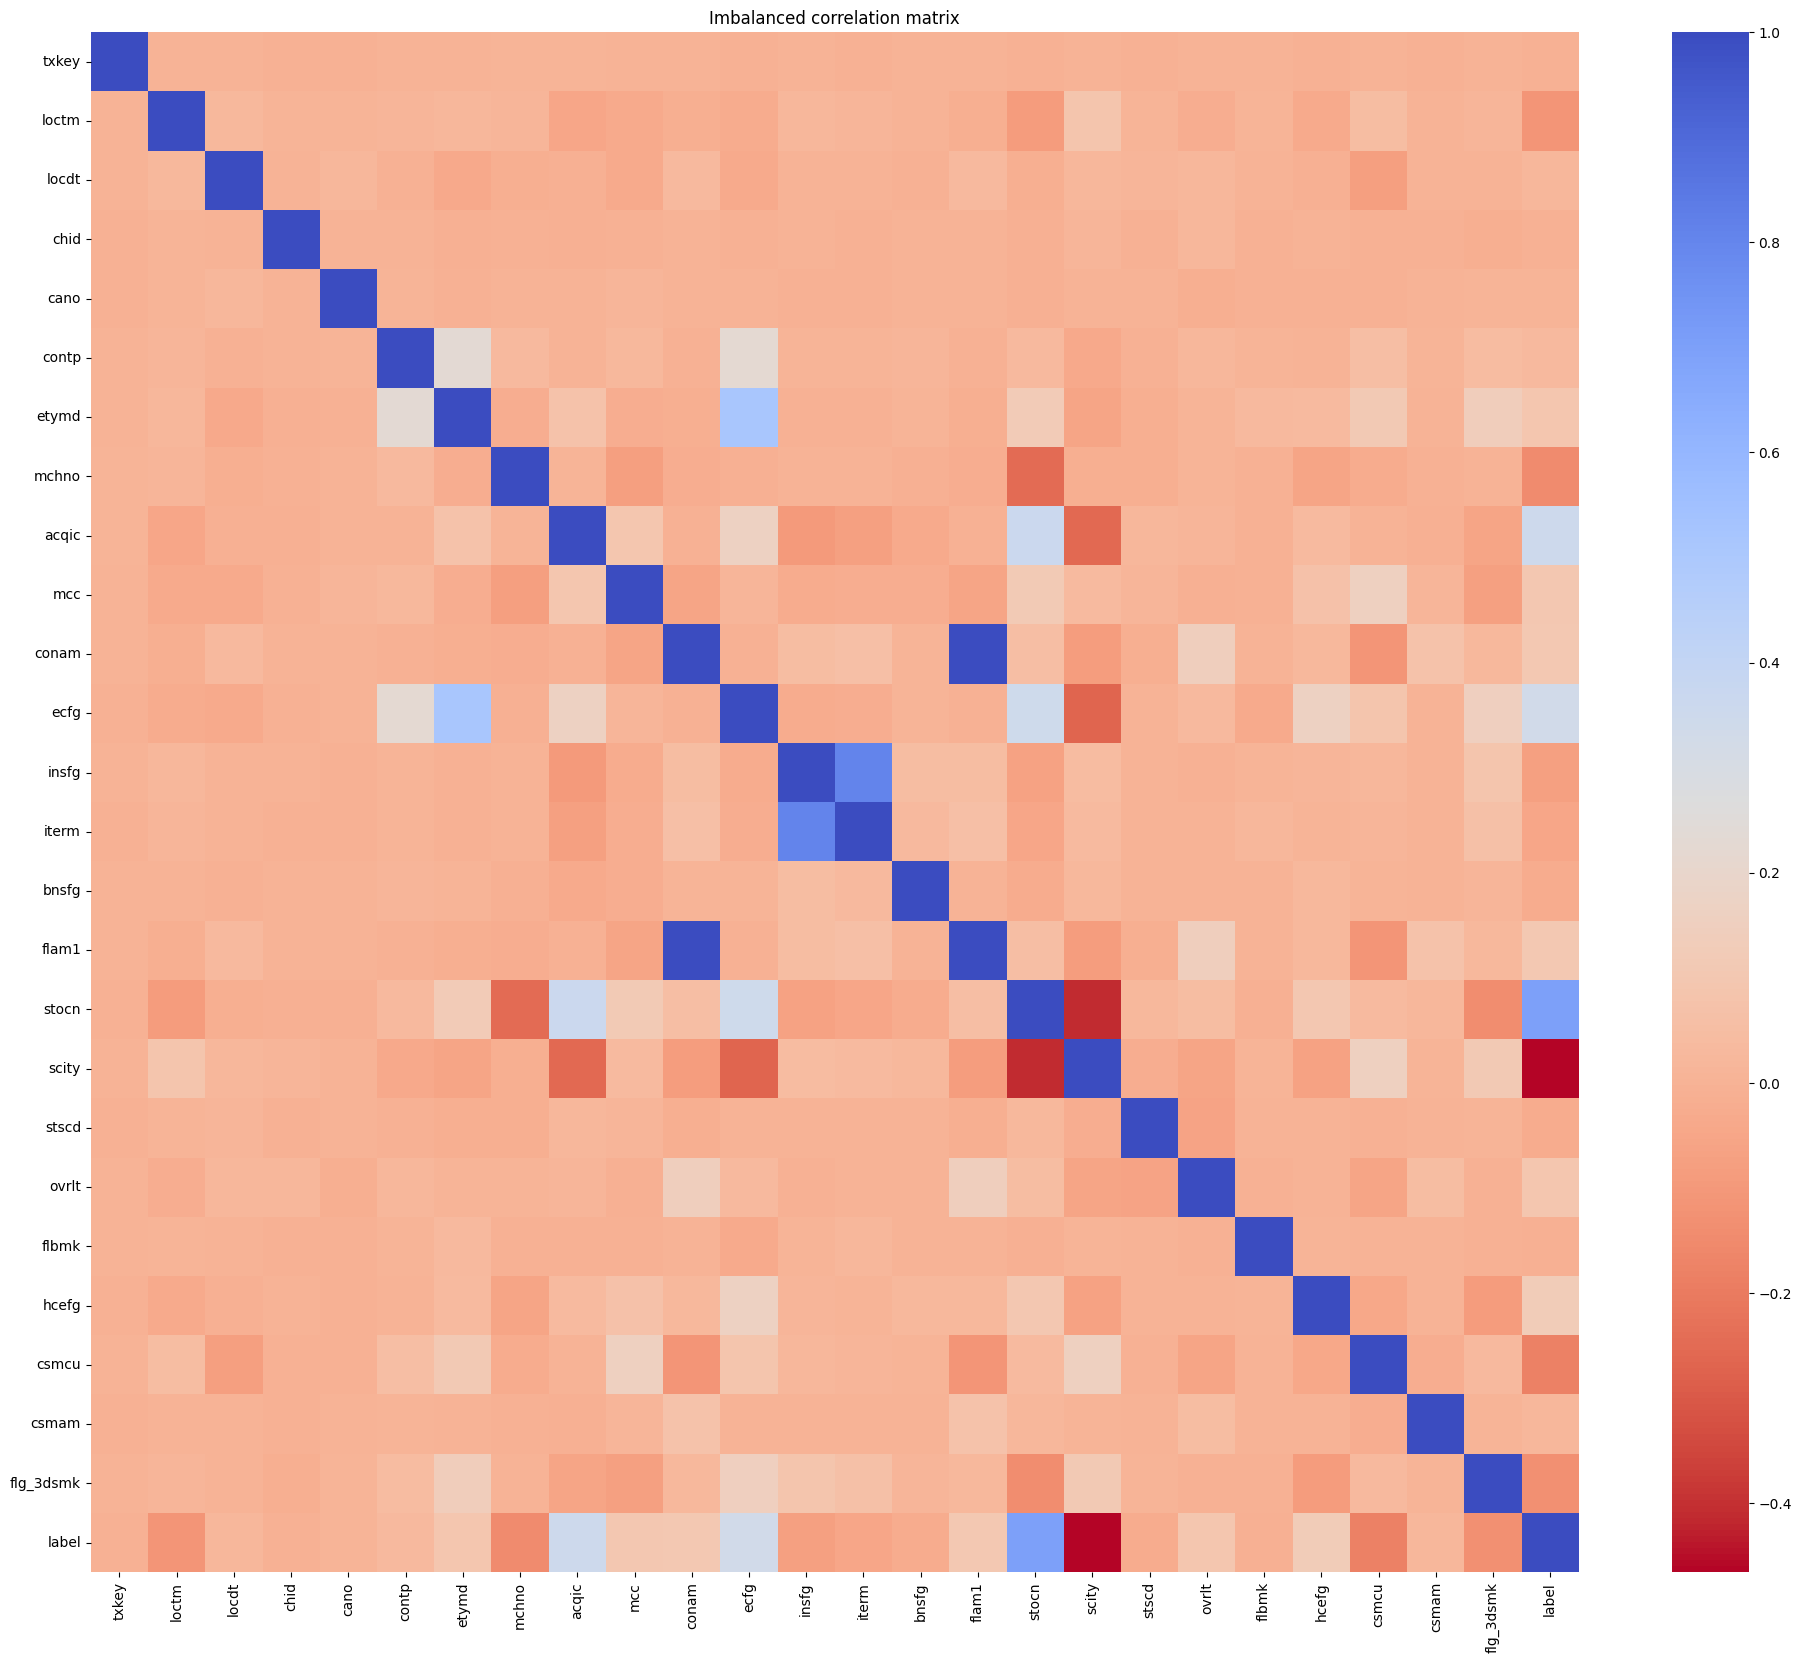

In [14]:
plt.figure(figsize=(24, 20))
corr = new_undersample_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Imbalanced correlation matrix')

In [15]:
corr['label'].sort_values(ascending=False)

label        1.000000
stocn        0.701375
acqic        0.348496
ecfg         0.333999
hcefg        0.127371
conam        0.103885
flam1        0.103881
mcc          0.097992
etymd        0.091751
ovrlt        0.089710
contp        0.030154
csmam        0.017133
locdt        0.017110
cano         0.009055
txkey       -0.004453
chid        -0.005012
flbmk       -0.008067
stscd       -0.027182
bnsfg       -0.028248
iterm       -0.052902
insfg       -0.071228
loctm       -0.114078
flg_3dsmk   -0.129705
mchno       -0.145582
csmcu       -0.180293
scity       -0.465720
Name: label, dtype: float64

# Clustering
compare t-SNE, PCA, and Truncated SCD

In [16]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [20]:
X = new_undersample_df.drop('label', axis=1)
y = new_undersample_df['label']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

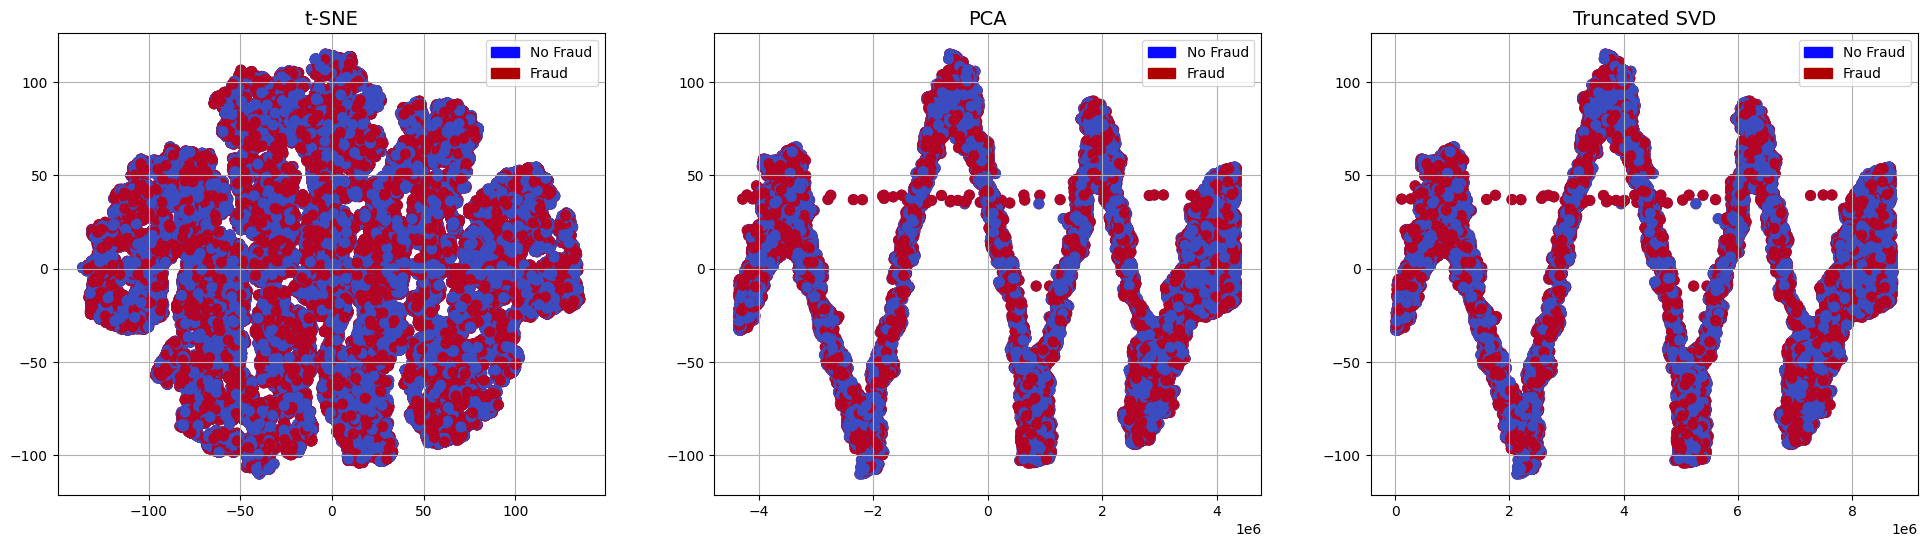

In [22]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidth=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap='coolwarm', label='Fraud', linewidth=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

ax2.scatter(X_reduced_pca[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidth=2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap='coolwarm', label='Fraud', linewidth=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

ax3.scatter(X_reduced_svd[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidth=2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap='coolwarm', label='Fraud', linewidth=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
                                  

# Training

In [28]:
X = new_undersample_df.drop('label', axis=1)
y = new_undersample_df['label']

In [29]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train.values)

In [33]:
X_test =  X_test.values
y_train = y_train.values
y_test = y_test.values

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [39]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'Classifiers: {key} has a training score of {round(training_score.mean(), 2)*100} % accuracy score')

/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Classifiers: LogisiticRegression has a training score of 89.0 % accuracy score
Classifiers: KNearest has a training score of 92.0 % accuracy score
Classifiers: Support Vector Classifier has a training score of 56.00000000000001 % accuracy score
Classifiers: DecisionTreeClassifier has a training score of 92.0 % accuracy score


In [41]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [43]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

# svc_score = cross_val_score(svc, X_train, y_train, cv=5)
# print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Logistic Regression Cross Validation Score:  89.13%
Knears Neighbors Cross Validation Score 91.88%
DecisionTree Classifier Cross Validation Score 91.46%


In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimatorˇ, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [49]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning (related to logistic regression convergence)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/NLP/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

NameError: name 'estimatorˇ' is not defined

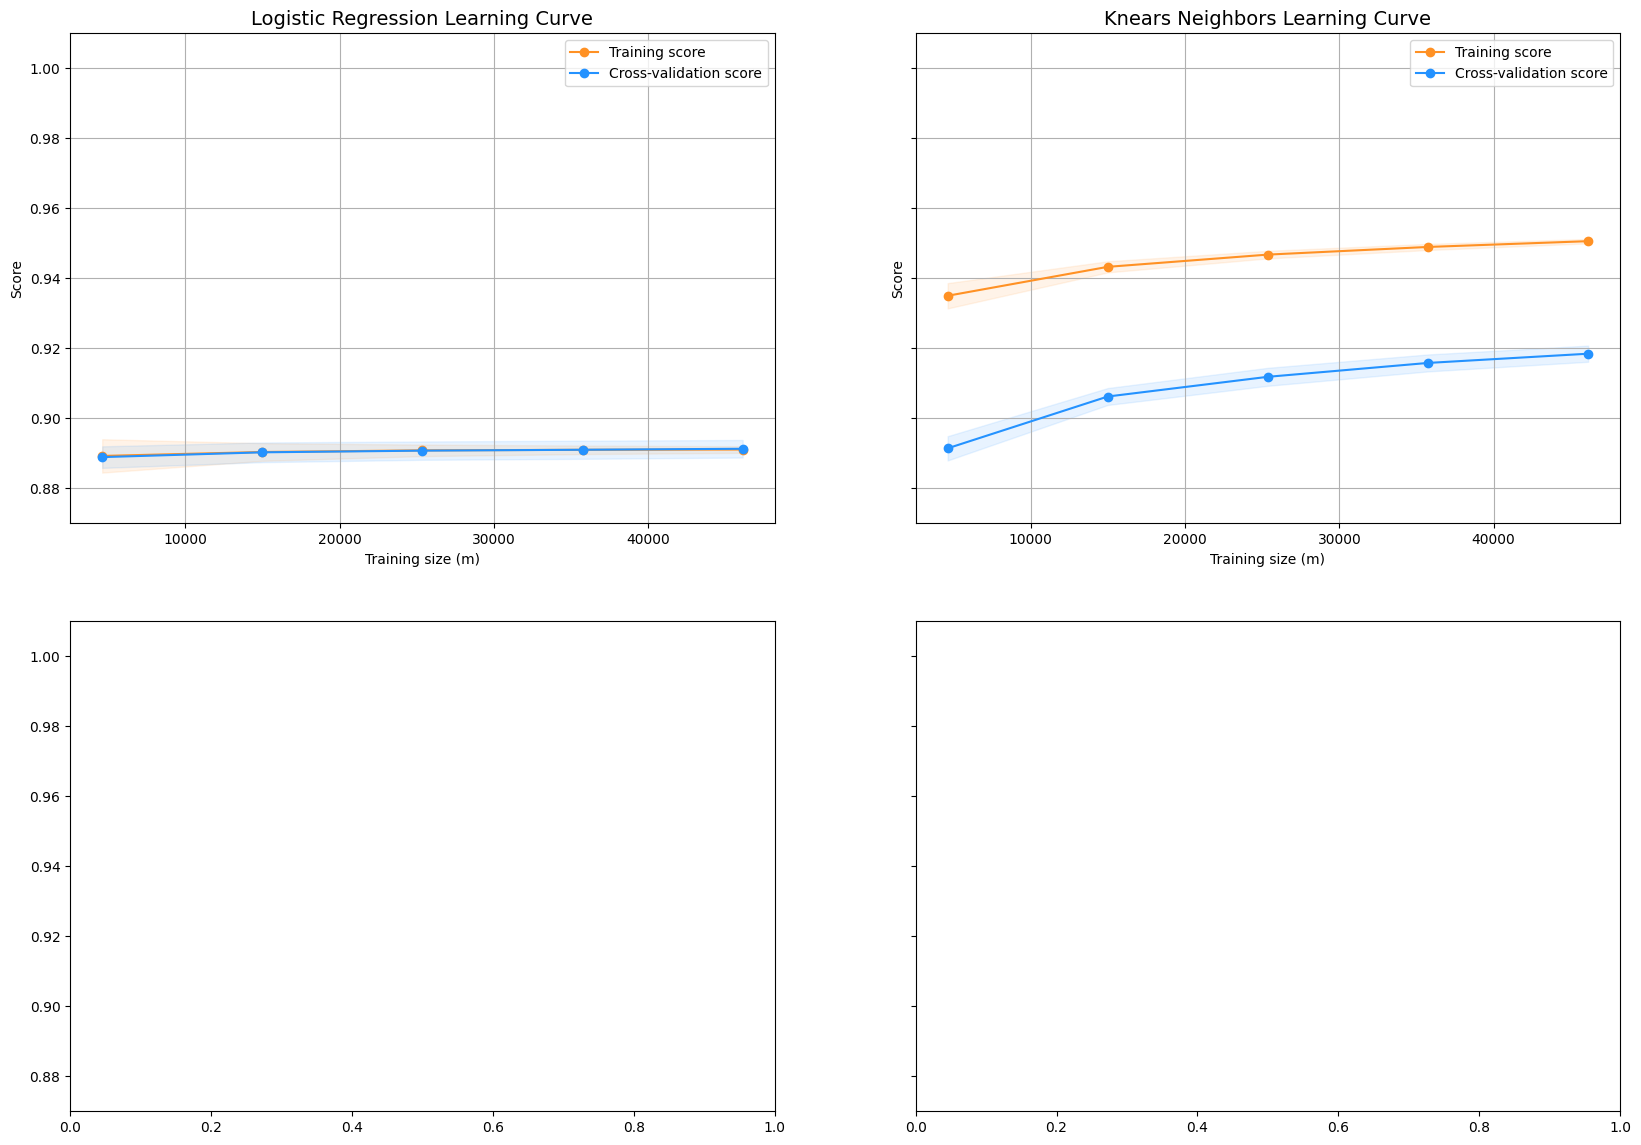

In [50]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=3)